# Chapter 04 Missing Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
url = (
    "http://biostat.mc.vanderbilt.edu/"
    "wiki/pub/Main/DataSets/titanic3.xls"
)
df = pd.read_excel(url)
orig_df = df

# Examining missing data

In [3]:
df.isnull().mean() * 100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

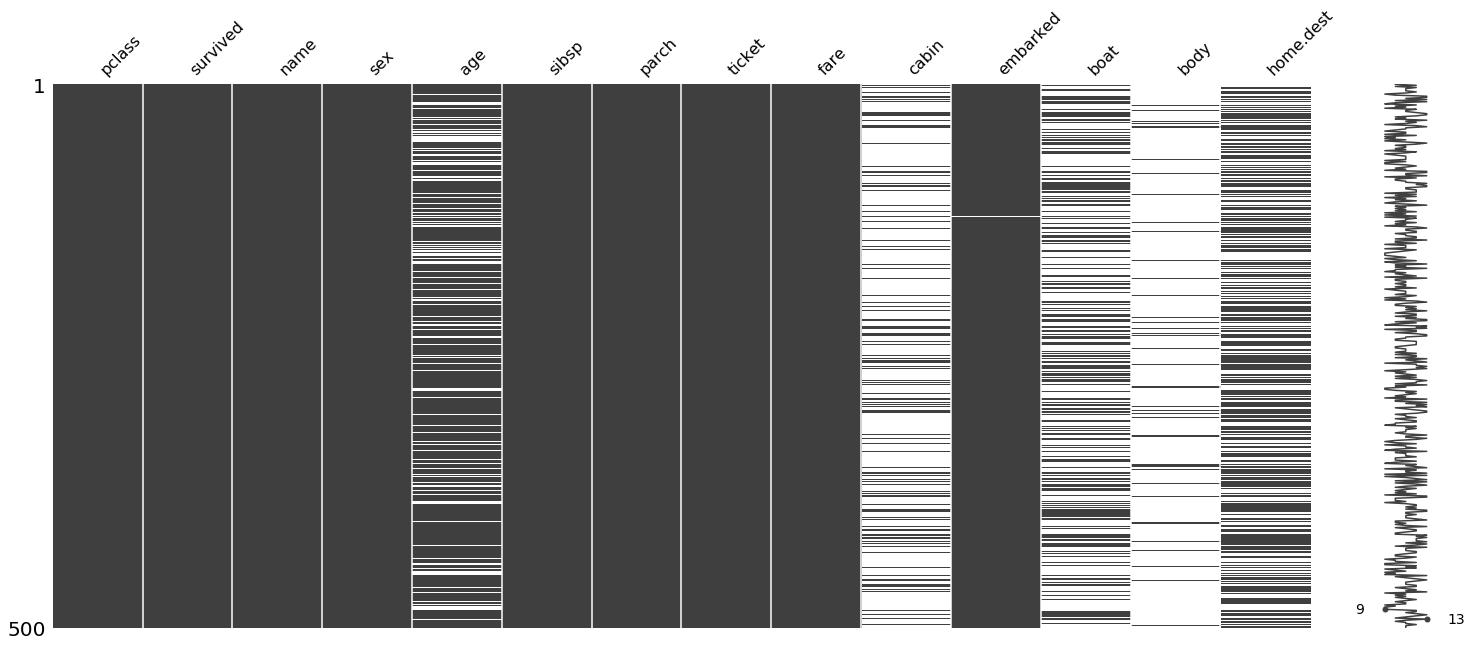

In [5]:
import missingno as msno
ax = msno.matrix(orig_df.sample(500))
#ax.get_figure().savefig("images/mlpr_0401.png")

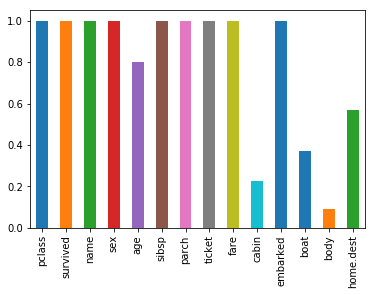

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)

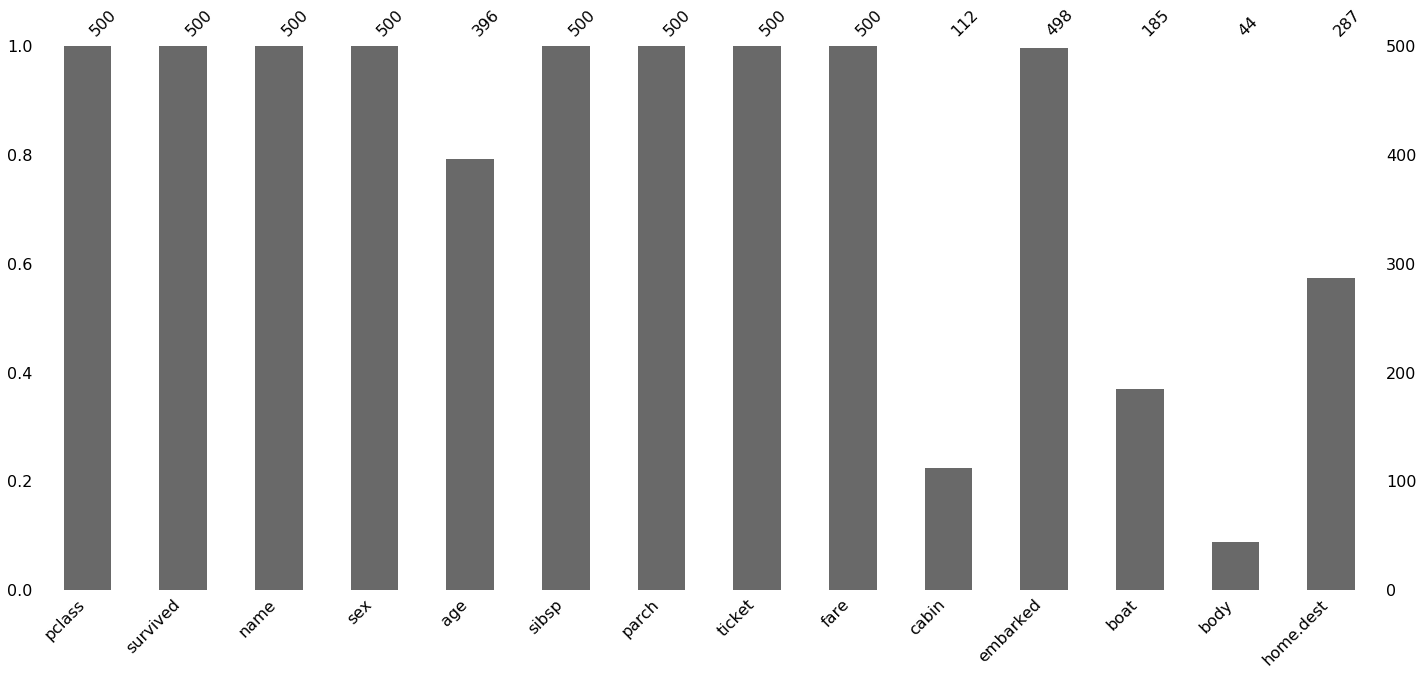

In [7]:
ax = msno.bar(orig_df.sample(500))

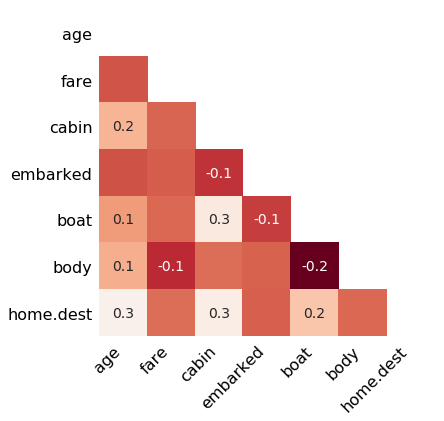

In [11]:
ax = msno.heatmap(df, figsize=(6, 6))

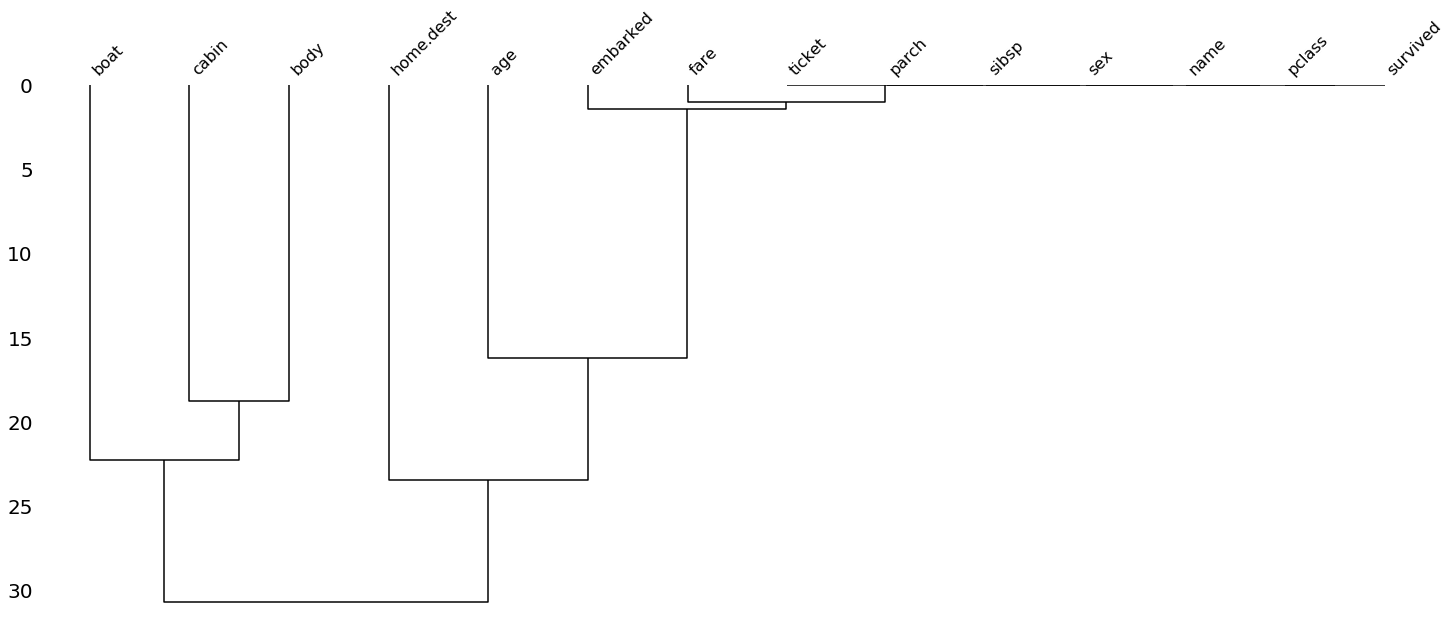

In [8]:
ax = msno.dendrogram(df)

# Dropping missing data

In [9]:
df1 = df.dropna() # last resort

In [10]:
df1 = df.drop(columns="cabin")

In [11]:
df1 = df.dropna(axis=1)

# Imputing data

In [14]:
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(
    include="number"
).columns
im = SimpleImputer()  # mean
imputed = im.fit_transform(df[num_cols])

In [17]:
imputed

array([[  1.        ,   1.        ,  29.        , ...,   0.        ,
        211.3375    , 160.80991736],
       [  1.        ,   1.        ,   0.9167    , ...,   2.        ,
        151.55      , 160.80991736],
       [  1.        ,   0.        ,   2.        , ...,   2.        ,
        151.55      , 160.80991736],
       ...,
       [  3.        ,   0.        ,  26.5       , ...,   0.        ,
          7.225     , 304.        ],
       [  3.        ,   0.        ,  27.        , ...,   0.        ,
          7.225     , 160.80991736],
       [  3.        ,   0.        ,  29.        , ...,   0.        ,
          7.875     , 160.80991736]])

In [19]:
def add_indicator(col):
    def wrapper(df):
        return df[col].isna().astype(int)

    return wrapper

In [20]:
df1 = df.assign(
    cabin_missing=add_indicator("cabin")
)

In [22]:
df1.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_missing
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN,1
